# Titanic - Machine Learning from Disaster
### Predict survival on the Titanic

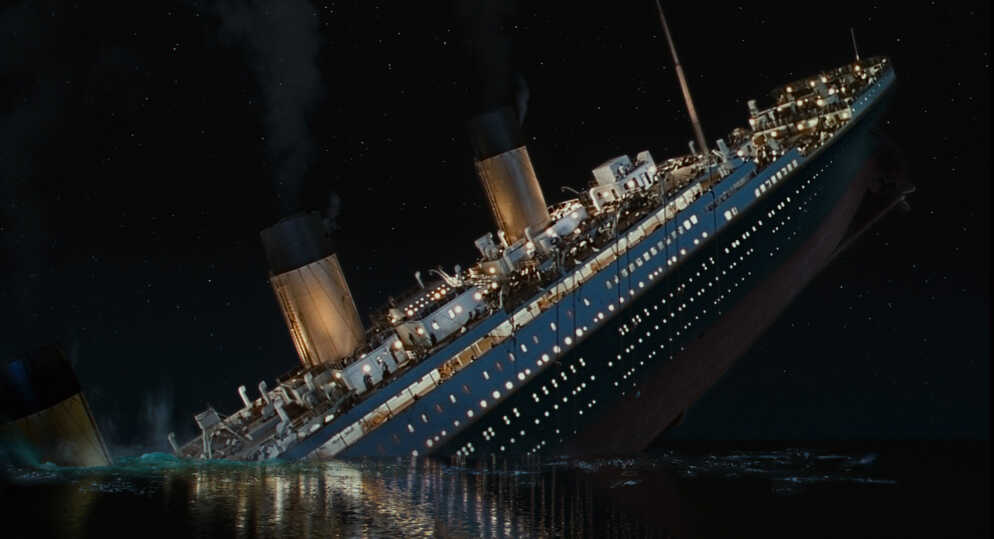

## <빅데이터 분석 절차>

<br>

1. 데이터 수집(Data Collection)
2. 데이터 전처리(Data Preprocessing)
3. 모델 선택(Model Selection)
4. 평가 및 적용(Evaluation & Application)

### 1. 데이터 수집 <br>
캐글에서 제공된 데이터 사용<br>
링크 : https://www.kaggle.com/competitions/titanic/

### Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

In [4]:
# 캐글에서 데이터 불러오기

import pandas as pd

train = pd.read_csv('./titanic_data/train.csv')
test = pd.read_csv('./titanic_data/test.csv')

In [12]:
# train 데이터 확인

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
train.shape

(891, 12)

In [19]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [13]:
# test 데이터 확인

test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [21]:
test.shape

(418, 11)

In [22]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


### Data Dictionary


Survived: 0 = No, 1 = Yes <br>
pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd <br>
sibsp: # of siblings / spouses aboard the Titanic <br>
parch: # of parents / children aboard the Titanic <br>
ticket: Ticket number <br>
cabin: Cabin number <br>
embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton <br>

### 2. 데이터 전처리
<br>

1. 누락 데이터 처리
2. 중복 데이터 처리
3. 데이터 표준화
- 단위 환산
- 자료형 변환
4. 범주형(카테고리) 데이터 처리
- 구간 분할
- 더미 변수
5. 정규화

### Data Dictionary


- PassengerId : 탑승자 명단 번호
- Survived : 탑승자의 생존 여부

- pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- sibsp: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- ticket: Ticket number
- cabin: Cabin number
- embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [6]:
# 타이타닉 파일 정리

import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold     # 교차검증
from sklearn.preprocessing import LabelEncoder # 전처리 관련 모듈

df = sns.load_dataset('titanic')
df.drop(['class', 'alive', 'embark_town', 'who', 'adult_male', 'alone'], axis=1, inplace=True)
df['family'] = df.sibsp + df.parch
df.drop(['sibsp', 'parch'], axis=1, inplace=True)

df1 = df.copy()
df1.embarked.fillna('S', inplace=True)

m1_med = df1.loc[(df1.sex == 'male') & (df1.pclass == 1), 'age'].median()
m2_med = df1.loc[(df1.sex == 'male') & (df1.pclass == 2), 'age'].median()
m3_med = df1.loc[(df1.sex == 'male') & (df1.pclass == 3), 'age'].median()
f1_med = df1.loc[(df1.sex == 'female') & (df1.pclass == 1), 'age'].median()
f2_med = df1.loc[(df1.sex == 'female') & (df1.pclass == 2), 'age'].median()
f3_med = df1.loc[(df1.sex == 'female') & (df1.pclass == 3), 'age'].median()

df1.loc[(df1.sex == 'male')&(df1.pclass == 1), 'age'].fillna(29, inplace=True)

df1.loc[(df1.sex == 'male')  &(df1.pclass == 1)&(df1.age.isna()), 'age'] = m1_med
df1.loc[(df1.sex == 'male')  &(df1.pclass == 2)&(df1.age.isna()), 'age'] = m2_med
df1.loc[(df1.sex == 'male')  &(df1.pclass == 3)&(df1.age.isna()), 'age'] = m3_med
df1.loc[(df1.sex == 'female')&(df1.pclass == 1)&(df1.age.isna()), 'age'] = f1_med
df1.loc[(df1.sex == 'female')&(df1.pclass == 2)&(df1.age.isna()), 'age'] = f2_med
df1.loc[(df1.sex == 'female')&(df1.pclass == 3)&(df1.age.isna()), 'age'] = f3_med

df1.drop('deck', axis=1, inplace=True)

df1.age_new = 0
# 노인의 생존율 (50세 이상) 유아의 생존율 (10세 미만)
df1.loc[df1.age >= 50, 'age_new'] = 'old'
df1.loc[(df1.age < 50) & (df1.age>=10), 'age_new'] = 'young'
df1.loc[df1.age < 10, 'age_new'] = 'baby'

for i in ['sex', 'embarked', 'age_new']:
    globals()[f'df1_{i}_encoder'] = LabelEncoder()
    globals()[f'df1_{i}_encoder'].fit(df1[i])
    df1[i] = globals()[f'df1_{i}_encoder'].transform(df1[i])
    
df1_sex_encoder = LabelEncoder()
df1_embarked_encoder = LabelEncoder()
df1_agenew_encoder = LabelEncoder()
df1_sex_encoder.fit(df1['sex'])
df1_embarked_encoder.fit(df1['embarked'])
df1_agenew_encoder.fit(df1['age_new'])
df1['sex'] = df1_sex_encoder.transform(df1['sex'])
df1['embarked'] = df1_embarked_encoder.transform(df1['embarked'])
df1['age_new'] = df1_agenew_encoder.transform(df1['age_new'])


def label_encoding(df):
    ecs = df.columns[(df.dtypes=='O')|(df.dtypes=='category')|(df.dtypes=='bool')]
    for i in ecs:
        globals()[f'{df}_{i}_encoder'] = LabelEncoder()
        globals()[f'{df}_{i}_encoder'].fit(df[i])
        df[i] = globals()[f'{df}_{i}_encoder'].transform(df[i])
label_encoding(df1)

X = df1.drop('survived', axis=1)
y = df1.survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=19)

# X = df1.drop('survived', axis=1)
# y = df1.survived

In [7]:
df1

,survived,pclass,sex,age,fare,embarked,family,age_new
0,0,3,1,22.0,7.2500,2,1,2
1,1,1,0,38.0,71.2833,0,1,2
2,1,3,0,26.0,7.9250,2,0,2
3,1,1,0,35.0,53.1000,2,1,2
4,0,3,1,35.0,8.0500,2,0,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,2,0,2
887,1,1,0,19.0,30.0000,2,0,2
888,0,3,0,21.5,23.4500,2,3,2
889,1,1,1,26.0,30.0000,0,0,2
